In [246]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats
import geopandas as gpd
import rasterio
from rasterio.plot import show
import seaborn as sns

In [247]:
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir=f"{proj_dir}/results"

In [248]:
#you can get this table from the SCAN dryad link
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


# Get results from other analyses

In [249]:
Path(f"{results_dir}/combined").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/combined")

In [250]:
its_df=pd.read_csv(f"{proj_dir}/results/sanger/its_class.csv", sep=",", keep_default_na=False,)
its_df

,wgs_id,its_id,its_seq,genotype_label,diagnostic_genotype,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,its_class
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,GATAT,G,A,T,A,T,SBxSB
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
...,...,...,...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,AGCGC,A,G,C,G,C,SHxSH
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,AGCGC,A,G,C,G,C,SHxSH
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH


In [251]:
mito_df=pd.read_csv(f"{proj_dir}/results/mito_read_count/mito_confidence.csv", sep=",", header=0)
mito_df

,sample_id,top_genome,runner_up,top_count,runner_count,total_reads,top_fraction,binom_pval_runner,flag
0,Sb_NG_ak_1.1,s_bovis,s_curassoni,138219,8045,154547,0.894349,0.0,OK
1,Sb_NG_ak_2.1,s_bovis,s_guineensis,101157,6530,115295,0.877375,0.0,OK
2,Sb_NG_ak_2.2,s_bovis,s_guineensis,244206,14624,274375,0.890045,0.0,OK
3,Sb_NG_ak_2.3,s_bovis,s_curassoni,97761,6068,109927,0.889327,0.0,OK
4,Sb_NG_ak_3.1,s_bovis,s_curassoni,231388,10569,252973,0.914675,0.0,OK
...,...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,s_haematobium,s_intercalatum,56771,1752,60378,0.940260,0.0,OK
201,c_Sh_NG_os_3_11,s_haematobium,s_intercalatum,5566,113,5794,0.960649,0.0,OK
202,c_Sh_NG_os_3_5,s_haematobium,s_intercalatum,16151,331,16833,0.959484,0.0,OK
203,c_Sh_NG_os_3_6,s_haematobium,s_intercalatum,47037,341,47831,0.983400,0.0,OK


In [252]:
pca_df=pd.read_csv(f"{proj_dir}/results/pca/pca.raw.csv", sep=",", header=0)
pca_df

,fid,wgs_id,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,ERR3012900,ERR3012900,0.127035,0.096575,-0.007914,-0.008089,0.002074,0.001486,-0.007485,0.001296,...,0.001378,0.003953,0.003379,-0.001405,0.015783,-0.019479,-0.020299,0.007567,-0.119611,-0.004627
1,ERR3012901,ERR3012901,0.127335,0.095973,-0.008921,-0.008169,0.000972,0.002832,-0.005712,-0.001796,...,0.005075,0.007011,0.004148,-0.012539,0.007286,-0.019631,-0.015529,0.003117,-0.096726,0.002388
2,ERR3012902,ERR3012902,0.159793,0.273780,-0.009177,-0.001562,0.001705,0.002788,-0.001865,0.002726,...,0.009444,-0.000149,-0.003347,0.004526,-0.005984,0.008526,0.011544,-0.004839,0.042547,-0.001146
3,ERR3012903,ERR3012903,0.127318,0.096197,-0.009191,-0.008209,0.002268,0.003252,-0.005400,0.000283,...,0.002992,0.005423,0.001644,0.008578,0.014265,-0.017453,-0.019601,0.008702,-0.111107,-0.000556
4,ERR3012904,ERR3012904,0.127315,0.096283,-0.008683,-0.006868,0.001194,0.001075,-0.005933,0.001070,...,0.003099,0.007453,0.005063,0.002153,0.011825,-0.021991,-0.019456,0.011000,-0.115009,-0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,c_Sh_NG_os_2_2,c_Sh_NG_os_2_2,-0.051976,0.009795,-0.048381,-0.017170,-0.000054,-0.008614,-0.072020,-0.016512,...,0.042293,0.029838,0.012960,0.011162,-0.013608,-0.000706,-0.004528,-0.008224,0.010048,-0.045300
196,c_Sh_NG_os_3_11,c_Sh_NG_os_3_11,-0.049502,0.009141,-0.050689,-0.015017,0.027602,0.014697,-0.054453,-0.052379,...,-0.011051,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351
197,c_Sh_NG_os_3_3,c_Sh_NG_os_3_3,-0.052228,0.009775,-0.068520,-0.024779,-0.006986,0.024916,-0.087718,-0.004124,...,0.065330,-0.015290,-0.046741,-0.009383,0.029969,-0.024676,0.008492,-0.065579,0.004691,-0.019109
198,c_Sh_NG_os_3_5,c_Sh_NG_os_3_5,-0.051540,0.010212,-0.059751,-0.019483,-0.007017,0.005133,-0.059528,-0.017235,...,0.061250,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584


In [254]:
adm_df = pd.read_csv(f"{proj_dir}/results/supervised_admixture/sup_adm_k3_df.csv", sep=",", header=0)
adm_df = adm_df.rename({"0": "adm0", "1": "adm1", "2": "adm2"}, axis=1)


# Merge WGS, MITO, and ITS data

In [256]:
df = info_df.merge(its_df, left_on=["wgs_id", "its_id"], right_on=["wgs_id", "its_id"], how="left")
df = df.merge(mito_df[["sample_id", "top_genome"]], left_on="wgs_id", right_on="sample_id", how="left")
df = df.rename(columns={"top_genome": "mitotype",
                        "genotype_label": "its_genotype_label"})
#clean up the mitotype label:
mito_label_mapping = dict(
    zip(df["mitotype"].unique(),
        [(x[0] + x[2]).upper() for x in df["mitotype"].unique()])
)

df["mitotype"] = df["mitotype"].map(mito_label_mapping)

df = df.merge(adm_df[["wgs_id", "adm0", "adm1", "adm2"]], on="wgs_id", how="left")
df = df.merge(pca_df, on="wgs_id", how="left")
df.drop("fid", axis=1, inplace=True)

locale_df = pd.DataFrame({
    "locale": ["borno", "kano", "kebbi", "kastina", "osun", "ebonyi", "kwara", "edo", "ondo"],
    "sh_population": ["N", "N", "N", "N", "S", "S", "S", "S", "S"]
})

df = df.merge(locale_df, on="locale", how="left")

df.to_csv("raw.merged.csv", sep=",", header=True, index=False)

df = df.loc[~df["species"].isin(['guineensis', 'intercalatum', 'matthei'])].reset_index(drop=True)
df.to_csv("merged.csv", sep=",", header=True, index=False)
df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,its_genotype_label,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,sh_population
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.006358,-0.020375,0.108408,0.028731,0.016279,0.002319,0.009262,0.064130,-0.011822,NaN
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.014729,-0.013940,0.067813,0.014646,0.013320,0.009242,0.001337,0.059829,0.002151,NaN
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.011701,-0.013872,0.084749,0.018241,0.021823,0.000826,0.003440,0.053144,0.002223,NaN
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,...,-0.010734,-0.012475,0.080161,0.019033,0.014301,0.008169,0.007875,0.067259,0.002167,NaN
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,...,-0.008588,-0.003102,0.003312,-0.007419,-0.003614,0.013514,0.002070,0.055334,0.009031,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,-0.012544,-0.053567,-0.010364,0.015380,-0.027423,0.007532,-0.039499,0.003975,-0.025205,S
198,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351,S
199,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584,S
200,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,0.002371,-0.001233,-0.012846,0.037577,-0.036532,-0.003324,-0.060917,0.022348,0.035746,S


# Numbers used in the manuscript

In [141]:
df["country"].value_counts()

country
nigeria       169
senegal        18
corsica         3
cdivoire        3
zambia          2
uganda          1
madagascar      1
angola          1
swaziland       1
namibia         1
lab             1
zanzibar        1
Name: count, dtype: int64

## ?How many samples from each species?

In [35]:
df["species"].value_counts()

species
shaematobium    138
sbovis           43
sbxsc             9
scurassoni        7
shxsb             4
margrebowiei      1
Name: count, dtype: int64

## ?How many samples from other publications?

In [96]:
len(df.loc[~df["sra"].isna()])

33

## ?How many Sh and Sb samples from Nigeria?

In [37]:
len(df.loc[df["country"]=="nigeria"])

169

In [38]:
df.loc[df["country"]=="nigeria"]["species"].value_counts()

species
shaematobium    132
sbovis           37
Name: count, dtype: int64

## ?How many samples were we able to get ITS genotypes for?

In [39]:
len(df.loc[df["its_seq"].notna()])

179

## ?How many samples are missing ITS genotypes?

In [152]:
len(df.loc[~df["its_seq"].notna()])

26

## ?How many samples were we able to get ITS genotypes for each species?

In [40]:
df.loc[df["its_seq"].notna(), "species"].value_counts()

species
shaematobium    138
sbovis           41
Name: count, dtype: int64

## ? How many unique ITS genotypes did we identify

In [41]:
len(df["its_genotype_label"].unique())-1

34

## ? How many unique SHAEMATOBIUM ITS genotypes did we identify

In [50]:
genotypes = df.loc[df["species"] == "shaematobium", "its_genotype_label"]
len(genotypes.value_counts())

27

In [55]:
genotypes.value_counts()

its_genotype_label
its-9_n44     44
its-14_n24    24
its-6_n22     22
its-17_n14    14
its-3_n7       7
its-18_n3      3
its-20_n2      2
its-19_n2      2
its-12_n2      2
its-24_n1      1
its-13_n1      1
its-26_n1      1
its-11_n1      1
its-22_n1      1
its-28_n1      1
its-23_n1      1
its-8_n1       1
its-10_n1      1
its-2_n1       1
its-7_n1       1
its-27_n1      1
its-4_n1       1
its-25_n1      1
its-5_n1       1
its-21_n1      1
its-15_n1      1
its-16_n1      1
Name: count, dtype: int64

In [68]:
tmp_df = df.loc[df["species"] == "shaematobium"]
tmp_df.loc[tmp_df["its_genotype_label"] == "its-9_n44", "country"].value_counts()

country
nigeria       42
madagascar     1
zanzibar       1
Name: count, dtype: int64

## ? How many unique SBOVIS ITS genotypes did we identify

In [56]:
genotypes = df.loc[df["species"] == "sbovis", "its_genotype_label"]
len(genotypes.value_counts())

7

In [57]:
genotypes.value_counts()

its_genotype_label
its-32_n34    34
its-29_n2      2
its-33_n1      1
its-34_n1      1
its-35_n1      1
its-31_n1      1
its-30_n1      1
Name: count, dtype: int64

In [60]:
genotypes.value_counts().sum()

np.int64(41)

In [69]:
tmp_df = df.loc[df["species"] == "sbovis"]
tmp_df.loc[tmp_df["its_genotype_label"] == "its-32_n34", "country"].value_counts()

country
nigeria     30
cdivoire     3
uganda       1
Name: count, dtype: int64

## ? How many unique ITS haplotypes only contain 1 individual

In [42]:
genotypes = df["its_genotype_label"].unique().astype(str)

# Count elements that end with '_n1'
np.sum([s.endswith('_n1') for s in genotypes])


np.int64(23)

### How many ITS genotypes

In [114]:
df.groupby(["diagnostic_genotype").apply(lambda g: pd.Series({
    "n_shaematobium": (g["species"] == "shaematobium").sum(),
    "n_sbovis": (g["species"] == "sbovis").sum(),
})).reset_index()


/tmp/ipykernel_45937/927617747.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("diagnostic_genotype").apply(lambda g: pd.Series({


,diagnostic_genotype,n_shaematobium,n_sbovis
0,AATAT,29,0
1,AGCGC,72,0
2,ARCRC,2,0
3,ARYAT,1,0
4,ARYRC,1,0
5,ARYRY,33,0
6,GATAT,0,41


In [119]:
df.groupby(['diagnostic_site_33', 'diagnostic_site_685', 'diagnostic_site_740',
       'diagnostic_site_790', 'diagnostic_site_860', "mitotype", "its_class"]).apply(lambda g: pd.Series({
    "n_shaematobium": (g["species"] == "shaematobium").sum(),
    "n_sbovis": (g["species"] == "sbovis").sum(),
})).reset_index()


/tmp/ipykernel_45937/787022980.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'diagnostic_site_790', 'diagnostic_site_860', "mitotype", "its_class"]).apply(lambda g: pd.Series({


,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,mitotype,its_class,n_shaematobium,n_sbovis
0,A,A,T,A,T,SB,SCxSC,28,0
1,A,A,T,A,T,SH,SCxSC,1,0
2,A,G,C,G,C,SB,SHxSH,24,0
3,A,G,C,G,C,SH,SHxSH,48,0
4,A,R,C,R,C,SB,SHxSC,1,0
5,A,R,C,R,C,SH,SHxSC,1,0
6,A,R,Y,A,T,SB,SHxSC,1,0
7,A,R,Y,R,C,SH,SHxSC,1,0
8,A,R,Y,R,Y,SB,SHxSC,19,0
9,A,R,Y,R,Y,SH,SHxSC,14,0


In [116]:
df.columns

Index(['wgs_id', 'its_id', 'sra', 'species', 'country', 'locale', 'patient',
       'miracidum', 'its_seq', 'its_genotype_label', 'diagnostic_genotype',
       'diagnostic_site_33', 'diagnostic_site_685', 'diagnostic_site_740',
       'diagnostic_site_790', 'diagnostic_site_860', 'its_class', 'sample_id',
       'mitotype', 'adm0', 'adm1', 'adm2', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5',
       'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14',
       'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'],
      dtype='object')

In [70]:
df.groupby(["its_class", "species"]).size().reset_index(name="count")

,its_class,species,count
0,SBxSB,sbovis,41
1,SCxSC,shaematobium,29
2,SHxSC,shaematobium,37
3,SHxSH,shaematobium,72


### How many Mitotypes

In [71]:
df.groupby(["species", "mitotype"]).size().reset_index(name="count")


,species,mitotype,count
0,margrebowiei,SM,1
1,sbovis,SB,43
2,sbxsc,SB,8
3,sbxsc,SC,1
4,scurassoni,SC,7
5,shaematobium,SB,73
6,shaematobium,SH,65
7,shxsb,SB,4


### How many from each major class

In [72]:
df.groupby(["species", "mitotype", "its_class"]).size().reset_index(name="count")

,species,mitotype,its_class,count
0,sbovis,SB,SBxSB,41
1,shaematobium,SB,SCxSC,28
2,shaematobium,SB,SHxSC,21
3,shaematobium,SB,SHxSH,24
4,shaematobium,SH,SCxSC,1
5,shaematobium,SH,SHxSC,16
6,shaematobium,SH,SHxSH,48


In [89]:
df.loc[((df["country"].isin(["nigeria"])) & (df["species"] == "shaematobium")), ["adm1"]].mean()*100

adm1    2.580206
dtype: float64

In [91]:
df.loc[((df["country"].isin(["nigeria"])) & (df["species"] == "shaematobium")), ["adm1"]].min()*100

adm1    0.001
dtype: float64

In [90]:
df.loc[((df["country"].isin(["nigeria"])) & (df["species"] == "shaematobium")), ["adm1"]].max()*100

adm1    14.4979
dtype: float64

# Plotting results

In [142]:
target_countries=["nigeria"]

sh   = 1-df.loc[((df["country"].isin(target_countries)) & (df["its_class"] == "SHxSH") & (df["species"] == "shaematobium")), "adm2"]
sc   = 1-df.loc[((df["country"].isin(target_countries)) & (df["its_class"] == "SCxSC") & (df["species"] == "shaematobium")), "adm2"]
scsh = 1-df.loc[((df["country"].isin(target_countries)) & (df["its_class"] == "SHxSC") & (df["species"] == "shaematobium")), "adm2"]

In [147]:
scsh.mean()

np.float64(0.02961364864864866)

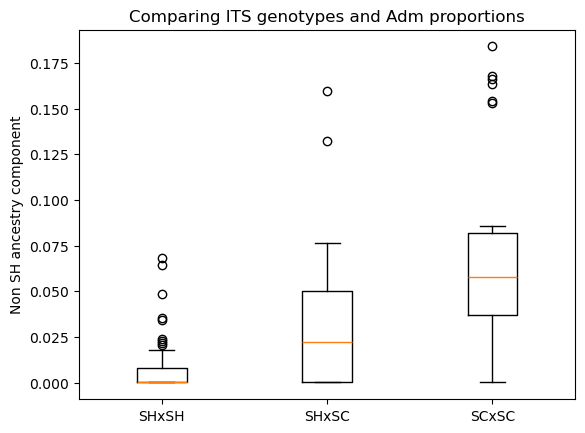

In [144]:

plt.boxplot([sh, scsh, sc], tick_labels=["SHxSH", "SHxSC", "SCxSC"])
plt.ylabel("Non SH ancestry component")
plt.title("Comparing ITS genotypes and Adm proportions")

plt.savefig("non_sh_boxplot.png", dpi=600, format="png", facecolor="white")
plt.savefig("non_sh_boxplot.svg", format="svg")

plt.show()

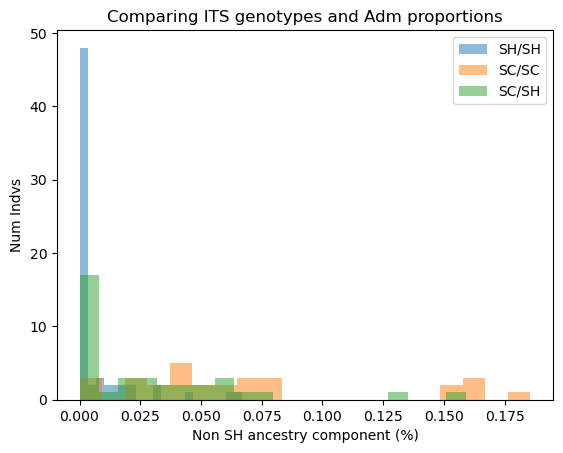

In [26]:
plt.hist(sh, bins=20, label="SH/SH", alpha=0.5)
plt.hist(sc, bins=20, label="SC/SC", alpha=0.5)
plt.hist(scsh, bins=20, label="SC/SH", alpha=0.5)
plt.legend()
plt.xlabel("Non SH ancestry component (%)")
plt.ylabel("Num Indvs")
plt.title("Comparing ITS genotypes and Adm proportions")

plt.savefig("non_sh_histogram.png", dpi=600, format="png", facecolor="white")
plt.savefig("non_sh_histogram.svg", format="svg")

plt.show()

In [27]:
import scikit_posthocs as sp

stat, p_value = stats.kruskal(sh, scsh, sc)

print(f"Kruskal-Wallis H test statistic: {stat}")
print(f"P-value: {p_value}")

# If the Kruskal-Wallis test is significant, perform pairwise Dunn's test
if p_value < 0.05:
    # Perform pairwise Dunn's test with Bonferroni correction
    dunn_result = sp.posthoc_dunn([sh, scsh, sc], p_adjust='bonferroni')
    print("Pairwise comparisons using Dunn's test with Bonferroni correction:")
    print(dunn_result)
else:
    print("The differences between the groups are not statistically significant, so pairwise tests are not necessary.")

Kruskal-Wallis H test statistic: 53.477711502345365
P-value: 2.4404083082590688e-12
Pairwise comparisons using Dunn's test with Bonferroni correction:
              1         2             3
1  1.000000e+00  0.004293  1.113406e-12
2  4.292681e-03  1.000000  3.050788e-04
3  1.113406e-12  0.000305  1.000000e+00


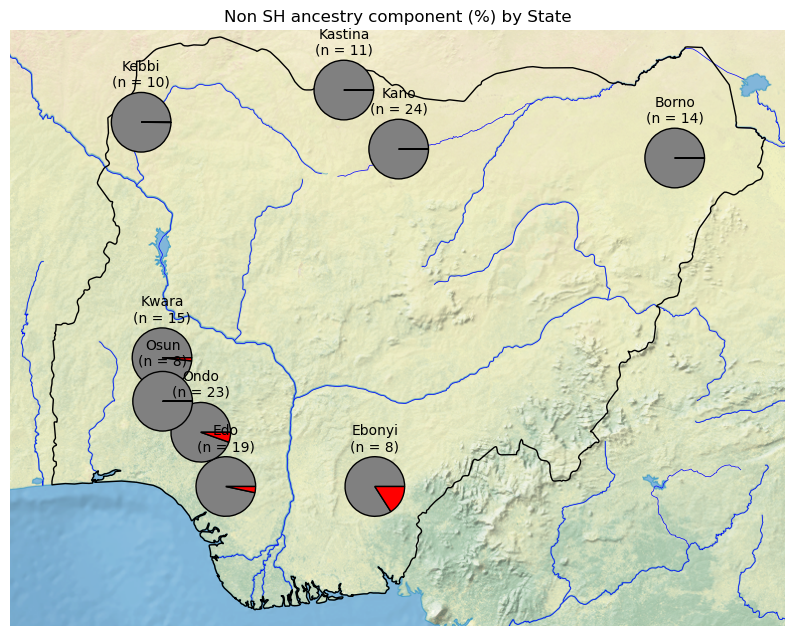

In [43]:
target_countries=["nigeria"]
tmp_df = df.loc[((df["country"].isin(target_countries)) & (df["species"].isin(["shaematobium"])))]

# Calculate mean value for each locale
mean_values = tmp_df.groupby('locale')["1"].mean().reset_index()
sample_counts = tmp_df['locale'].value_counts().reset_index()
sample_counts.columns = ['locale', 'count']
mean_values = mean_values.merge(sample_counts, on='locale')

# Set shapefile paths
country_outline_path = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_0_countries.shp'
state_boundaries_path = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_1_states_provinces.shp'
geography_regions_path = f'{proj_dir}/data/natural_earth_files/ne_10m_geography_regions_polys.shp'
rivers_lakes_path = f'{proj_dir}/data/natural_earth_files/ne_10m_rivers_lake_centerlines.shp'
populated_places_path = f'{proj_dir}/data/natural_earth_files/ne_10m_populated_places.shp'
raster_image_path = f'{proj_dir}/data/natural_earth_files/NE1_HR_LC_SR_W_DR.tif'

# Read the shapefiles
nigeria_outline = gpd.read_file(country_outline_path)
state_boundaries = gpd.read_file(state_boundaries_path)
geography_regions = gpd.read_file(geography_regions_path)
rivers_lakes = gpd.read_file(rivers_lakes_path)
populated_places = gpd.read_file(populated_places_path)

# Filter for Nigeria in the country outline
nigeria_outline = nigeria_outline[nigeria_outline['ADMIN'] == 'Nigeria']
# Filter for Nigeria in the state boundaries
state_boundaries = state_boundaries[state_boundaries['admin'] == 'Nigeria']
# Filter for major cities in Nigeria
major_cities = populated_places[populated_places['ADM0NAME'] == 'Nigeria']

# Open the raster image
raster = rasterio.open(raster_image_path)

# Plot the map of Nigeria
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Show the raster image
show(raster, ax=ax, zorder=0)

# Plot rivers and lakes with blue boundaries
rivers_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, zorder=1)

# Plot the outline of Nigeria with a thicker black boundary
nigeria_outline.boundary.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)

# Coordinates for each state (approximate)
state_coords = {
    'ondo': (5.2, 7.25),
    'kwara': (4.55, 8.5),
    'edo': (5.62, 6.34),
    'kano': (8.52, 12.0),
    'borno': (13.15, 11.85),
    'kebbi': (4.2, 12.45),
    'kastina': (7.6, 12.99),
    'osun': (4.56, 7.77),
    'ebonyi': (8.12, 6.34)}

# Add pie charts and labels at the approximate locations of each state
for index, row in mean_values.iterrows():
    state = row['locale']
    value = row['1']
    count = row['count']
    coords = state_coords[state]
    
    # Create pie chart data
    sizes = [value, 1 - value]
    colors = ['grey', 'red']
    
    # Add pie chart
    ax.pie(sizes, colors=colors, radius=0.5, center=coords, wedgeprops={'edgecolor': 'black', 'alpha': 1})
    
    # Add text label
    ax.text(coords[0], coords[1] + 0.6, f'{state}\n(n = {count})'.capitalize(), ha='center', fontsize=10, zorder=3)

# # Plot major cities
# for idx, row in major_cities.iterrows():
#     plt.plot(row.geometry.x, row.geometry.y, marker='o', color='black', markersize=5, zorder=2)
#     plt.text(row.geometry.x, row.geometry.y, row['NAME'], fontsize=8, ha='right', zorder=2)

# Set x and y limits to fit Nigeria map properly
ax.set_xlim(2, 15)
ax.set_ylim(4, 14)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Set the title of the plot
plt.title('Non SH ancestry component (%) by State')

# Optionally save the figure
plt.savefig("non_sh_map.png", dpi=600, format="png", facecolor="white")
plt.savefig("non_sh_map.svg", format="svg")

# Show the plot
plt.show()


In [159]:
merged_df = pd.read_csv(f"merged.csv", sep=",", header=0)
float(merged_df.loc[merged_df["country"] == "lab", "adm2"].values[0])
str(merged_df.loc[merged_df["country"] == "lab", "mitotype"].values[0])

'SB'

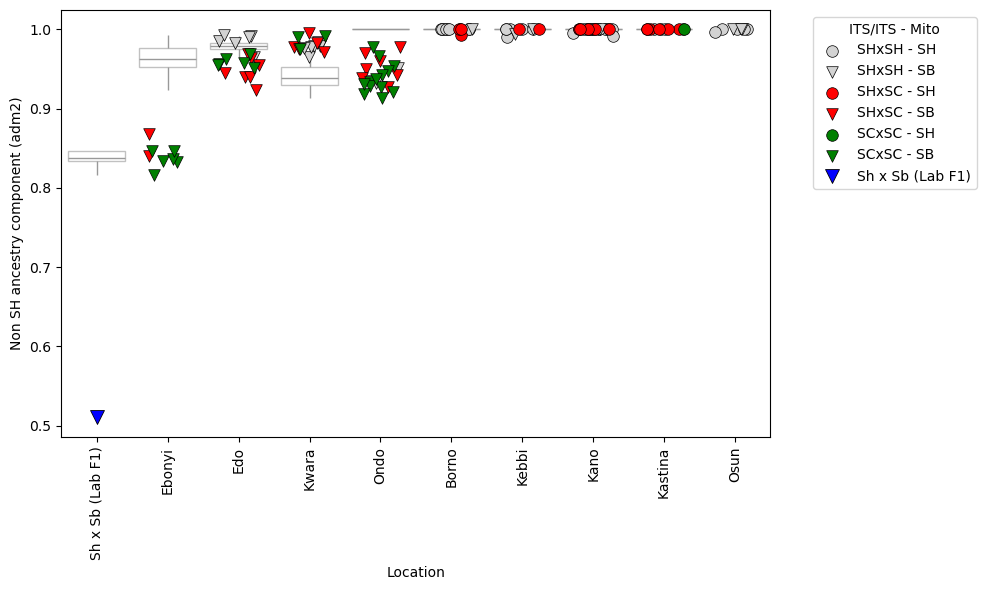

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----- config -----
merged_df = pd.read_csv("merged.csv", sep=",", header=0)

# order of locations from south to north
s_pops = ["ebonyi", "edo", "kwara", "ondo"]
n_pops = ["borno", "kebbi", "kano", "kastina", "osun"]
states_order = s_pops + n_pops  # field states only (no lab label here)

# colors and markers
palette = {'SHxSH': 'lightgrey', 'SHxSC': 'red', 'SCxSC': 'green'}
shape_mapping = {'SH': 'o', 'SB': 'v'}

# ----- prep: field data (Nigeria only) -----
df_field = merged_df.loc[
    (merged_df["species"].isin(["shaematobium"])) & (merged_df["country"] == "nigeria")
].copy()

# map each state to an index 0..N-1, then create a plotting column shifted by +1
state_mapping = {state: i for i, state in enumerate(states_order)}
df_field["state_numeric"] = df_field["locale"].map(state_mapping)

# y-value: adm2
df_field = df_field.dropna(subset=["state_numeric", "adm2"]).copy()

# normalization for ITS class (if you later change palette keys)
df_field["its_class_fmt"] = df_field["its_class"].astype(str)

# plotting position: shift by +1 so 1..N (leaving 0 for Lab F1)
df_field["x_plot"] = df_field["state_numeric"] + 1

# ----- lab hybrid (single point, no ITS genotype) -----
lab_rows = merged_df.loc[merged_df["country"] == "lab"]
if lab_rows.shape[0] > 0:
    lab_value = float(lab_rows["adm2"].values[0])
    lab_mito = str(lab_rows["mitotype"].values[0])
else:
    lab_value, lab_mito = None, None  # handles missing lab row gracefully

# ----- plot -----
plt.figure(figsize=(10, 6))

# 1) Boxplots for field states at x = 1..N
sns.boxplot(
    x="x_plot", y="adm2",
    data=df_field,
    whis=1.5, color="white", showcaps=False, showfliers=False,
    boxprops=dict(alpha=0.6), zorder=1
)

# fade boxes slightly
ax = plt.gca()
for patch in ax.artists:
    r, g, b, _ = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.3))

# 2) Scatter points for field samples with jitter around their shifted x positions
labels_used = set()
for genotype, color in palette.items():
    subset = df_field[df_field["its_class_fmt"] == genotype]
    if subset.empty:
        continue
    for mito, shape in shape_mapping.items():
        mito_subset = subset[subset["mitotype"] == mito]
        if mito_subset.empty:
            continue
        jitter = np.random.uniform(-0.3, 0.3, size=len(mito_subset))
        label = f"{genotype} - {mito}"
        use_label = label if label not in labels_used else None
        plt.scatter(
            mito_subset["x_plot"] + jitter,
            mito_subset["adm2"],
            color=color, edgecolor="black", s=70, linewidths=0.5,
            marker=shape, alpha=1, zorder=5, label=use_label
        )
        labels_used.add(label)

# 3) Single Lab F1 point at x=0 (if present)
if lab_value is not None:
    lab_marker = shape_mapping.get(lab_mito, "o")
    plt.scatter(
        0, lab_value,
        color="blue", edgecolor="black", s=100, linewidths=0.6,
        marker=lab_marker, zorder=6, label="Sh x Sb (Lab F1)"
    )

# Axis limits and ticks
all_labels = ["Sh x Sb (Lab F1)"] + [s.capitalize() for s in states_order]
xticks_positions = list(range(len(all_labels)))  # 0..N
plt.xticks(ticks=xticks_positions, labels=all_labels, rotation=90)

# pad limits so jitter doesn't clip
plt.xlim(-0.5, len(all_labels) - 0.5)

plt.xlabel("Location")
plt.ylabel("Non SH ancestry component (adm2)")
plt.legend(title="ITS/ITS - Mito", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.savefig("adm_vs_its_NIGERIA.png", dpi=300, format="png", facecolor="white")
plt.savefig("adm_vs_its_NIGERIA.svg", format="svg")
plt.show()


In [195]:
tmp_df

,state_numeric,adm2,mitotype,its_class_fmt,locale,wgs_id,its_id,sra,species,country,...,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
1,1,0.833936,SB,SCxSC,ebonyi,c_Sh_NG_eb_2_3,sh_ng_eb_2_3,NaN,shaematobium,nigeria,...,-0.075380,-0.149860,0.249048,0.053650,-0.089122,-0.074792,0.225385,-0.248554,-0.046470,0.123463
2,1,0.867627,SB,SHxSC,ebonyi,c_Sh_NG_eb_1_3,Sh.NG.eb.1.3F,NaN,shaematobium,nigeria,...,-0.082601,-0.145112,0.149669,0.056764,-0.153181,-0.213078,-0.153779,0.182824,0.037820,-0.094137
3,1,0.846712,SB,SCxSC,ebonyi,c_Sh_NG_eb_6_3,Sh.NG.eb.6.3F,NaN,shaematobium,nigeria,...,0.046922,0.203013,-0.253437,-0.017222,0.018900,0.158774,-0.042811,-0.048104,-0.037713,-0.011295
4,1,0.845892,SB,SCxSC,ebonyi,c_Sh_NG_eb_6_1,Sh.NG.eb.6.1F,NaN,shaematobium,nigeria,...,0.031908,0.211711,-0.231765,-0.018757,0.025550,0.146293,-0.020979,-0.038657,-0.026084,0.024890
5,1,0.836370,SB,SCxSC,ebonyi,c_Sh_NG_eb_6_2,sh_ng_eb_6_2,NaN,shaematobium,nigeria,...,0.044780,0.176785,-0.205136,-0.019985,0.047000,0.084018,-0.079474,-0.051884,-0.003160,0.066693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,9,0.999980,SH,SHxSH,osun,c_Sh_NG_os_3_3,sh_ng_os_3_3,NaN,shaematobium,nigeria,...,0.065330,-0.015290,-0.046741,-0.009383,0.029969,-0.024676,0.008492,-0.065579,0.004691,-0.019109
129,9,0.999980,SH,SHxSH,osun,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,...,0.050808,-0.012544,-0.053567,-0.010364,0.015380,-0.027423,0.007532,-0.039499,0.003975,-0.025205
130,9,0.996946,SH,SHxSH,osun,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,...,-0.011051,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351
131,9,0.999980,SH,SHxSH,osun,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,...,0.061250,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584


In [206]:
df_field[["state_numeric", "x_plot"]].value_counts()

state_numeric  x_plot
6              7         24
3              4         23
1              2         19
2              3         15
4              5         14
7              8         11
5              6         10
0              1          8
8              9          8
Name: count, dtype: int64

In [205]:
# --- imports ---
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
from rasterio.plot import show

# -------------------------
# Subplot 1: inputs you already have in memory
#   - df (with columns: country, species, locale, "1")
#   - proj_dir (for file paths)
# -------------------------

target_countries = ["nigeria"]
tmp_df = df.loc[
    (df["country"].isin(target_countries)) &
    (df["species"].isin(["shaematobium"]))
].copy()

# Calculate mean value for each locale + sample counts
mean_values = tmp_df.groupby('locale')["adm2"].mean().reset_index()
sample_counts = tmp_df['locale'].value_counts().reset_index()
sample_counts.columns = ['locale', 'count']
mean_values = mean_values.merge(sample_counts, on='locale', how='left')

# Shapefile / raster paths
country_outline_path     = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_0_countries.shp'
state_boundaries_path    = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_1_states_provinces.shp'
geography_regions_path   = f'{proj_dir}/data/natural_earth_files/ne_10m_geography_regions_polys.shp'
rivers_lakes_path        = f'{proj_dir}/data/natural_earth_files/ne_10m_rivers_lake_centerlines.shp'
populated_places_path    = f'{proj_dir}/data/natural_earth_files/ne_10m_populated_places.shp'
raster_image_path        = f'{proj_dir}/data/natural_earth_files/NE1_HR_LC_SR_W_DR.tif'

# Read layers
nigeria_outline  = gpd.read_file(country_outline_path)
state_boundaries = gpd.read_file(state_boundaries_path)
geography_regions = gpd.read_file(geography_regions_path)
rivers_lakes      = gpd.read_file(rivers_lakes_path)
populated_places  = gpd.read_file(populated_places_path)

# Filter to Nigeria
nigeria_outline  = nigeria_outline[nigeria_outline['ADMIN'] == 'Nigeria']
state_boundaries = state_boundaries[state_boundaries['admin'] == 'Nigeria']
major_cities     = populated_places[populated_places['ADM0NAME'] == 'Nigeria']

# Raster
raster = rasterio.open(raster_image_path)

# Approximate label/pie centers per state
state_coords = {
    'ondo':   (5.2,  7.25),
    'kwara':  (4.55, 8.5),
    'edo':    (5.62, 6.34),
    'kano':   (8.52, 12.0),
    'borno':  (13.15, 11.85),
    'kebbi':  (4.2,  12.45),
    'kastina':(7.6,  12.99),  # keeping your spelling as-is to match data
    'osun':   (4.56, 7.77),
    'ebonyi': (8.12, 6.34)
}

# -------------------------
# Subplot 2: inputs from merged.csv
# -------------------------
merged_df = pd.read_csv("merged.csv", sep=",", header=0)

# order of locations from south to north
s_pops = ["ebonyi", "edo", "kwara", "ondo"]
n_pops = ["borno", "kebbi", "kano", "kastina", "osun"]
states_order = s_pops + n_pops  # field states only (no lab label here)

# colors and markers
palette = {'SHxSH': 'lightgrey', 'SHxSC': 'red', 'SCxSC': 'green'}
shape_mapping = {'SH': 'o', 'SB': 'v'}

# Field-only (Nigeria, shaematobium)
df_field = merged_df.loc[
    (merged_df["species"].isin(["shaematobium"])) &
    (merged_df["country"] == "nigeria")
].copy()

# map each state to index and create plotting column shifted by +1
state_mapping = {state: i for i, state in enumerate(states_order)}
df_field["state_numeric"] = df_field["locale"].map(state_mapping)
df_field = df_field.dropna(subset=["state_numeric", "adm2"]).copy()
df_field["x_plot"] = df_field["state_numeric"] + 1

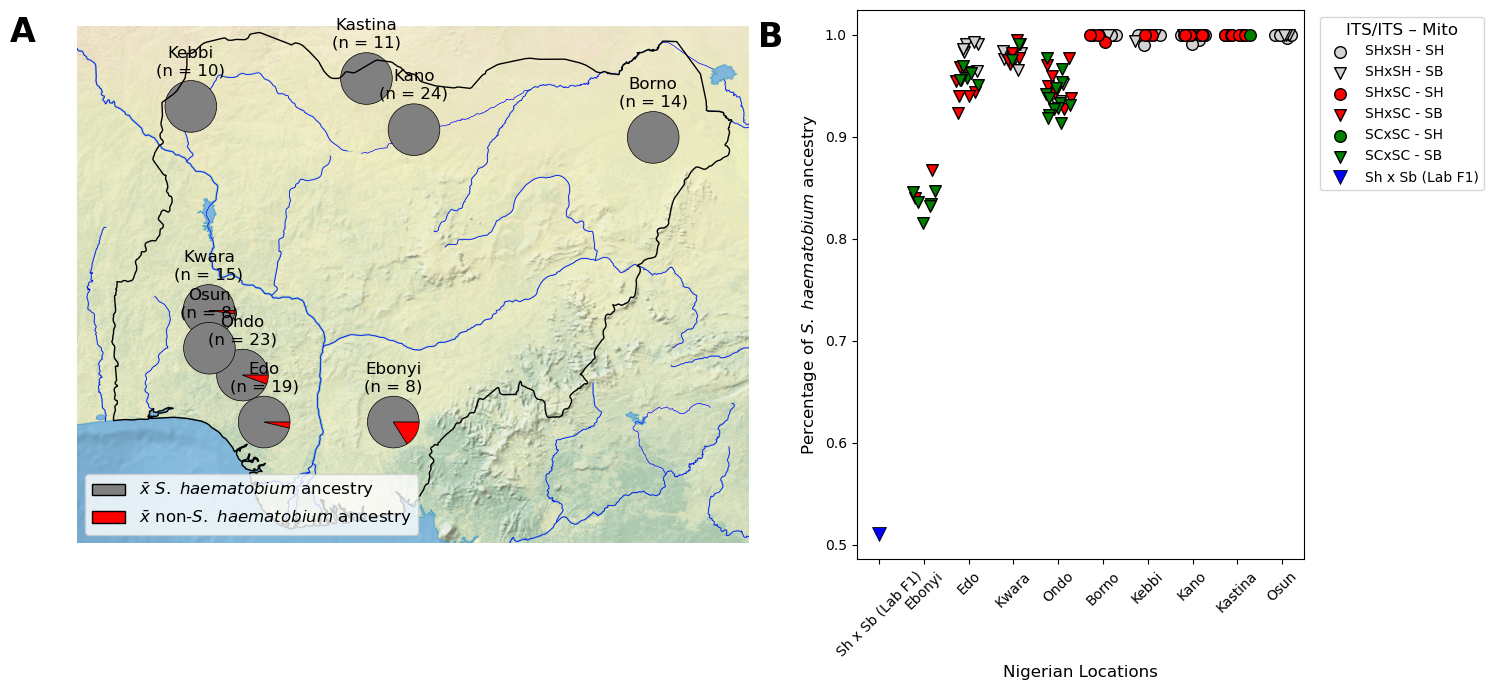

In [236]:
# --- imports ---
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
from rasterio.plot import show

# -------------------------
# Subplot 1: inputs you already have in memory
#   - df (with columns: country, species, locale, "1")
#   - proj_dir (for file paths)
# -------------------------

target_countries = ["nigeria"]
tmp_df = df.loc[
    (df["country"].isin(target_countries)) &
    (df["species"].isin(["shaematobium"]))
].copy()

# Calculate mean value for each locale + sample counts
mean_values = tmp_df.groupby('locale')["adm2"].mean().reset_index()
sample_counts = tmp_df['locale'].value_counts().reset_index()
sample_counts.columns = ['locale', 'count']
mean_values = mean_values.merge(sample_counts, on='locale', how='left')

# Shapefile / raster paths
country_outline_path     = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_0_countries.shp'
state_boundaries_path    = f'{proj_dir}/data/natural_earth_files/ne_10m_admin_1_states_provinces.shp'
geography_regions_path   = f'{proj_dir}/data/natural_earth_files/ne_10m_geography_regions_polys.shp'
rivers_lakes_path        = f'{proj_dir}/data/natural_earth_files/ne_10m_rivers_lake_centerlines.shp'
populated_places_path    = f'{proj_dir}/data/natural_earth_files/ne_10m_populated_places.shp'
raster_image_path        = f'{proj_dir}/data/natural_earth_files/NE1_HR_LC_SR_W_DR.tif'

# Read layers
nigeria_outline  = gpd.read_file(country_outline_path)
state_boundaries = gpd.read_file(state_boundaries_path)
geography_regions = gpd.read_file(geography_regions_path)
rivers_lakes      = gpd.read_file(rivers_lakes_path)
populated_places  = gpd.read_file(populated_places_path)

# Filter to Nigeria
nigeria_outline  = nigeria_outline[nigeria_outline['ADMIN'] == 'Nigeria']
state_boundaries = state_boundaries[state_boundaries['admin'] == 'Nigeria']
major_cities     = populated_places[populated_places['ADM0NAME'] == 'Nigeria']

# Raster
raster = rasterio.open(raster_image_path)

# Approximate label/pie centers per state
state_coords = {
    'ondo':   (5.2,  7.25),
    'kwara':  (4.55, 8.5),
    'edo':    (5.62, 6.34),
    'kano':   (8.52, 12.0),
    'borno':  (13.15, 11.85),
    'kebbi':  (4.2,  12.45),
    'kastina':(7.6,  12.99),  # keeping your spelling as-is to match data
    'osun':   (4.56, 7.77),
    'ebonyi': (8.12, 6.34)
}

# -------------------------
# Subplot 2: inputs from merged.csv
# -------------------------
merged_df = pd.read_csv("merged.csv", sep=",", header=0)

# order of locations from south to north
s_pops = ["ebonyi", "edo", "kwara", "ondo"]
n_pops = ["borno", "kebbi", "kano", "kastina", "osun"]
states_order = s_pops + n_pops  # field states only (no lab label here)

# colors and markers
palette = {'SHxSH': 'lightgrey', 'SHxSC': 'red', 'SCxSC': 'green'}
shape_mapping = {'SH': 'o', 'SB': 'v'}

# Field-only (Nigeria, shaematobium)
df_field = merged_df.loc[
    (merged_df["species"].isin(["shaematobium"])) &
    (merged_df["country"] == "nigeria")
].copy()

# map each state to index and create plotting column shifted by +1
state_mapping = {state: i for i, state in enumerate(states_order)}
df_field["state_numeric"] = df_field["locale"].map(state_mapping)
df_field = df_field.dropna(subset=["state_numeric", "adm2"]).copy()
df_field["x_plot"] = df_field["state_numeric"] + 1

# normalize ITS class string for palette
df_field["its_class_fmt"] = df_field["its_class"].astype(str)

# lab hybrid (optional)
lab_rows = merged_df.loc[merged_df["country"] == "lab"]
if lab_rows.shape[0] > 0:
    lab_value = float(lab_rows["adm2"].values[0])
    lab_mito  = str(lab_rows["mitotype"].values[0])
else:
    lab_value, lab_mito = None, None

# ==========================================================
# Build the combined figure (2 subplots, side-by-side)
# ==========================================================
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [3, 2]}
)

# ---- Left: Map with pies ----
show(raster, ax=ax1, zorder=0)
rivers_lakes.plot(ax=ax1, edgecolor='blue', linewidth=0.5, zorder=1)
nigeria_outline.boundary.plot(ax=ax1, linewidth=1, edgecolor='black', zorder=2)

# pies + labels
for _, row in mean_values.iterrows():
    state = row['locale']
    if state not in state_coords:
        continue  # skip locales without coordinates
    value = float(row['adm2'])
    count = int(row['count'])
    x, y = state_coords[state]

    sizes = [value, 1 - value]
    colors = ['grey', 'red']

    # Clean slice logic before plotting
    value = float(row['adm2'])
    sizes = [value, 1 - value]
    
    # if the slice is >99.5% or <0.5%, treat as a full circle
    if sizes[0] > 0.995:
        sizes = [1.0]
        colors = ['grey']
    elif sizes[0] < 0.005:
        sizes = [1.0]
        colors = ['red']
    
    # draw pie
    ax1.pie(
        sizes,
        colors=colors,
        radius=0.5,
        center=(x, y),
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'alpha': 1}
    )
    ax1.text(
        x, y + 0.6, f'{state}\n(n = {count})'.capitalize(),
        ha='center', fontsize=12,
    )

ax1.set_xlim(2, 15)
ax1.set_ylim(4, 14)
ax1.set_aspect('equal')

# Optional legend proxy for pie colors
from matplotlib.patches import Patch

pie_legend = [
    Patch(
        facecolor='grey',
        edgecolor='black',
        label=r'$\bar{x}$ ' + r'$\it{S.\ haematobium}$ ancestry',
    ),
    Patch(
        facecolor='red',
        edgecolor='black',
        label=r'$\bar{x}$ ' + r'non-$\it{S.\ haematobium}$ ancestry',
    )
]

ax1.legend(
    handles=pie_legend,
    loc='lower left',
    frameon=True,
    fontsize=12,       
    title_fontsize=12   
)

# ---- Right: Box + jitter ----
# 1) Boxplots at x=1..N
positions = df_field["x_plot"].unique()
data = [df_field.loc[df_field["x_plot"] == x, "adm2"] for x in positions]

# ax2.boxplot(data, positions=positions, widths=0.5, patch_artist=True, zorder=10)

# fade boxes slightly
for patch in ax2.artists:
    r, g, b, _ = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.3))

# 2) Scatter with jitter—use fixed RNG for reproducibility
rng = np.random.default_rng(42)
labels_used = set()
for genotype, color in palette.items():
    subset = df_field[df_field["its_class_fmt"] == genotype]
    if subset.empty:
        continue
    for mito, shape in shape_mapping.items():
        mito_subset = subset[subset["mitotype"] == mito]
        if mito_subset.empty:
            continue
        jitter = rng.uniform(-0.3, 0.3, size=len(mito_subset))
        label = f"{genotype} - {mito}"
        use_label = label if label not in labels_used else None
        ax2.scatter(
            mito_subset["x_plot"] + jitter,
            mito_subset["adm2"],
            color=color, edgecolor="black", s=70,
            marker=shape, alpha=1, zorder=5, label=use_label
        )
        labels_used.add(label)

# 3) Lab point at x=0 (if present)
if lab_value is not None:
    lab_marker = shape_mapping.get(lab_mito, "o")
    ax2.scatter(
        0, lab_value,
        color="blue", edgecolor="black", s=100, linewidths=0.6,
        marker=lab_marker, zorder=6, label="Sh x Sb (Lab F1)"
    )

# Ticks, labels
all_labels = ["Sh x Sb (Lab F1)"] + [s.capitalize() for s in states_order]
xticks_positions = list(range(len(all_labels)))  # 0..N
ax2.set_xticks(xticks_positions)
ax2.set_xticklabels(all_labels, rotation=45)
ax2.set_xlim(-0.5, len(all_labels) - 0.5)
ax2.set_xlabel("Nigerian Locations", fontsize=12)
ax2.set_ylabel(r'Percentage of $\it{S.\ haematobium}$ ancestry', fontsize=12)
ax2.legend(title="ITS/ITS – Mito", bbox_to_anchor=(1.02, 1), loc="upper left", title_fontsize=12)

# Panel labels
# for ax, lab in zip([ax1, ax2], ["A", "B"]):
ax1.text(
    -0.1, 1.02, "A",
    transform=ax1.transAxes,  # axis-relative coords
    ha="left", va="top",
    fontsize=24, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", facecolor=None, alpha=0, edgecolor="none")
)
ax2.text(
    -0.22, 0.98, "B",
    transform=ax2.transAxes,  # axis-relative coords
    ha="left", va="top",
    fontsize=24, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", facecolor=None, alpha=0, edgecolor="none")
)


# Overall title + layout
plt.tight_layout()

# Save combined figure
fig.savefig("nigeria_two_panel.png", dpi=600, facecolor="white")
fig.savefig("nigeria_two_panel.svg")

plt.show()


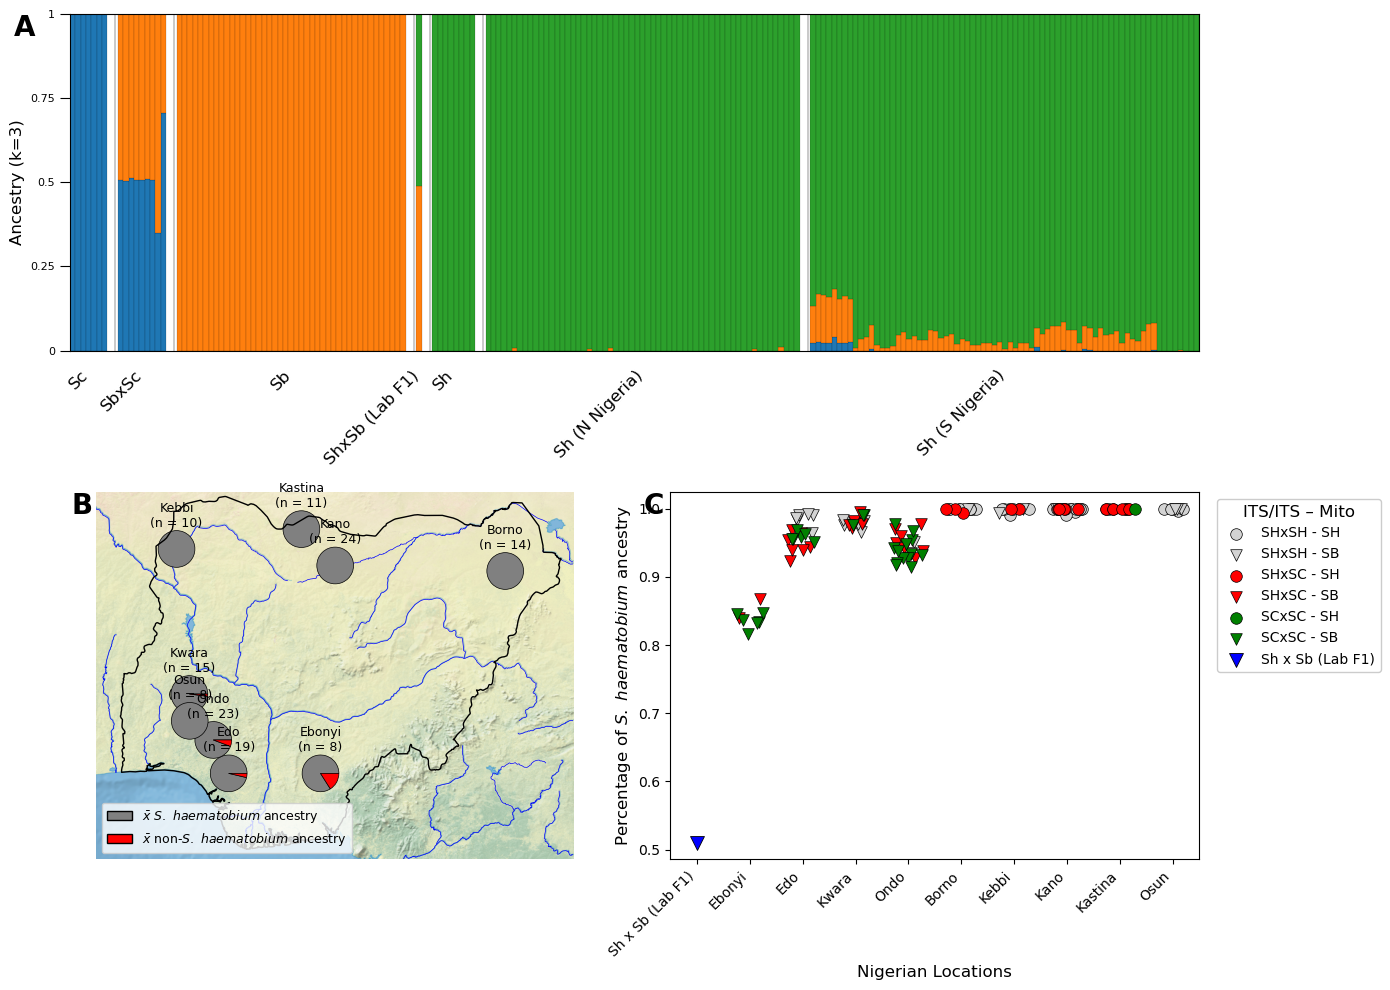

In [245]:
# --- imports (merge with your existing ones as needed) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio
from rasterio.plot import show
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# =============================
# CONFIG (edit as you like)
# =============================
K = 3
gap_size = 2.0  # visible gap between admixture groups
pie_linewidth = 0.5
EPS = 0.005     # threshold for collapsing nearly-1.0 pie slices
adm_df=pd.read_csv("/master/nplatt/sch_hae_its-nigeria/results/supervised_admixture/sup_adm_k3_df.mod.csv", sep=",", header=0)
                   
# custom group labels for admixture top panel
custom_labels = {
    "scurassoni": "Sc",
    "shaematobium": "Sh",
    "sbovis": "Sb",
    "sbxsc": "SbxSc",
    "shxsb": "ShxSb (Lab F1)",
    "shaematobium-north": "Sh (N Nigeria)",
    "shaematobium-south": "Sh (S Nigeria)",
}

# Manual state coordinates (use your existing dict)
state_coords = {
    'ondo':   (5.2,  7.25),
    'kwara':  (4.55, 8.5),
    'edo':    (5.62, 6.34),
    'kano':   (8.52, 12.0),
    'borno':  (13.15, 11.85),
    'kebbi':  (4.2,  12.45),
    'kastina':(7.6,  12.99),
    'osun':   (4.56, 7.77),
    'ebonyi': (8.12, 6.34)
}

# =============================
# SUBPLOT BUILDERS
# =============================

def plot_admixture(ax, adm_df, gap_size=2.0, K=3, custom_labels=None):
    """Top panel: stacked bars with group gaps and custom labels."""
    df = adm_df.copy().sort_values("adm_xorder").reset_index(drop=True)

    # run IDs (consecutive groups)
    group_change = (df["adm_group"] != df["adm_group"].shift()).fillna(True).to_numpy()
    df["run_id"] = np.cumsum(group_change) - 1

    # final x = order + run_id * gap_size  (keeps order, inserts gaps)
    df["xpos"] = df["adm_xorder"] + df["run_id"] * gap_size

    # stacked bars (assume components are "0","1","2")
    bottom = np.zeros(len(df), dtype=float)
    for k in ("0", "1", "2"):
        vals = df[k].astype(float).to_numpy()
        ax.bar(
            df["xpos"], vals, bottom=bottom, width=1.0,
            edgecolor="black", linewidth=0.1
        )
        bottom += vals

    # group info for separators & labels
    group_info = (
        df.groupby(["run_id", "adm_group"])["xpos"]
          .agg(start="min", end="max")
          .reset_index()
          .sort_values("run_id")
          .reset_index(drop=True)
    )

    # vertical separator at midpoint of each gap (before each group except first)
    for i in range(1, len(group_info)):
        start_this = group_info.loc[i, "start"]
        ax.axvline(start_this - gap_size/2, color="black", linewidth=0.3)

    # centered labels under each block
    for _, row in group_info.iterrows():
        center = 0.5 * (row["start"] + row["end"] + 1.0)
        gname = row["adm_group"]
        label_text = custom_labels.get(gname, gname) if custom_labels else gname
        ax.text(
            center, -0.05, label_text,
            rotation=45, ha="right", va="top", fontsize=12, clip_on=False
        )

    # aesthetics
    ax.set_ylabel("Ancestry (k=3)", fontsize=12)
    ax.set_xlim(df["xpos"].min() - 0.5, df["xpos"].max() + 0.5)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"], fontsize=8)
    ax.tick_params(length=7, labelbottom=False)


def plot_map(ax, mean_values, nigeria_outline, rivers_lakes, raster, state_coords,
             title="Non-SH ancestry component (mean) by State",
             eps=EPS, pie_linewidth=0.5):
    """Bottom-left panel: Nigeria map with pies using mean_values (columns: locale, adm2, count)."""
    # base layers
    if raster is not None:
        show(raster, ax=ax, zorder=0)
    rivers_lakes.plot(ax=ax, edgecolor='blue', linewidth=0.5, zorder=1)
    nigeria_outline.boundary.plot(ax=ax, linewidth=1, edgecolor='black', zorder=2)

    # pies
    for _, row in mean_values.iterrows():
        state = row['locale']
        if state not in state_coords:
            continue
        value = float(row['adm2'])
        count = int(row['count'])
        x, y = state_coords[state]

        sizes = [value, 1 - value]
        colors = ['grey', 'red']

        # collapse near-pure slices to a single wedge
        if sizes[0] > 1 - eps:
            sizes, colors = [1.0], ['grey']
        elif sizes[0] < eps:
            sizes, colors = [1.0], ['red']

        ax.pie(
            sizes, colors=colors, radius=0.5, center=(x, y),
            wedgeprops={'edgecolor': 'black', 'linewidth': pie_linewidth, 'alpha': 1}
        )
        ax.text(x, y + 0.6, f'{state}\n(n = {count})'.capitalize(),
                ha='center', fontsize=9)

    ax.set_xlim(2, 15)
    ax.set_ylim(4, 14)
    ax.set_aspect('equal')
    # ax.set_title(title, fontsize=11)

    # legend for pies
    pie_legend = [
        Patch(facecolor='grey', edgecolor='black',
              label=r'$\bar{x}$ $\it{S.\ haematobium}$ ancestry'),
        Patch(facecolor='red', edgecolor='black',
              label=r'$\bar{x}$ non-$\it{S.\ haematobium}$ ancestry')
    ]
    ax.legend(handles=pie_legend, loc='lower left', frameon=True, fontsize=9, title_fontsize=10)


def plot_box(ax, df_field, states_order, lab_value=None, lab_mito=None):
    """Bottom-right panel: boxplot + jitter by state with ITS/mito styling."""
    # palette & markers (match your earlier)
    palette = {'SHxSH': 'lightgrey', 'SHxSC': 'red', 'SCxSC': 'green'}
    shape_mapping = {'SH': 'o', 'SB': 'v'}
    rng = np.random.default_rng(42)

    # map to numeric x (1..N), lab at 0
    state_mapping = {state: i for i, state in enumerate(states_order)}
    dfp = df_field.copy()
    dfp["state_numeric"] = dfp["locale"].map(state_mapping)
    dfp = dfp.dropna(subset=["state_numeric", "adm2"]).copy()
    dfp["x_plot"] = dfp["state_numeric"] + 1
    dfp["its_class_fmt"] = dfp["its_class"].astype(str)

    # Boxplots (using seaborn)
    # sns.boxplot(
    #     x="x_plot", y="adm2", data=dfp,
    #     whis=1.5, color="white", showcaps=False, showfliers=False,
    #     boxprops=dict(alpha=0.6), zorder=1, ax=ax
    # )
    for patch in ax.artists:
        r, g, b, _ = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.3))

    # Scatter with jitter and legend labels
    labels_used = set()
    for genotype, color in palette.items():
        sub = dfp[dfp["its_class_fmt"] == genotype]
        if sub.empty:
            continue
        for mito, shape in shape_mapping.items():
            sub2 = sub[sub["mitotype"] == mito]
            if sub2.empty:
                continue
            jitter = rng.uniform(-0.3, 0.3, size=len(sub2))
            label = f"{genotype} - {mito}"
            use_label = label if label not in labels_used else None
            ax.scatter(
                sub2["x_plot"] + jitter,
                sub2["adm2"],
                color=color, edgecolor="black", s=70, linewidths=0.5,
                marker=shape, alpha=1, zorder=5, label=use_label
            )
            labels_used.add(label)

    # Lab point at x=0
    if lab_value is not None:
        lab_marker = shape_mapping.get(lab_mito, "o")
        ax.scatter(0, lab_value, color="blue", edgecolor="black",
                   s=100, linewidths=0.6, marker=lab_marker, zorder=6,
                   label="Sh x Sb (Lab F1)")

    # ticks/labels
    all_labels = ["Sh x Sb (Lab F1)"] + [s.capitalize() for s in states_order]
    xticks_positions = list(range(len(all_labels)))  # 0..N
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(all_labels, rotation=45, ha='right')
    ax.set_xlim(-0.5, len(all_labels) - 0.5)
    ax.set_xlabel("Nigerian Locations", fontsize=12)
    ax.set_ylabel(r'Percentage of $\it{S.\ haematobium}$ ancestry', fontsize=12)

    leg = ax.legend(title="ITS/ITS – Mito", bbox_to_anchor=(1.02, 1),
                    loc="upper left", title_fontsize=12, fontsize=10, frameon=True)
    leg.get_frame().set_alpha(1)


# =============================
# ASSEMBLY (MULTIPLOT)
# =============================
# Assumes you’ve already precomputed:
# - adm_df (with columns "0","1","2", adm_group, adm_xorder)
# - mean_values (locale, adm2 (mean), count)
# - nigeria_outline (GeoDataFrame), rivers_lakes (GeoDataFrame), raster (rasterio dataset or None)
# - df_field (field samples for boxplot), states_order list
# - lab_value, lab_mito (optional)

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1.1, 1.2], width_ratios=[1, 1])

ax_top = fig.add_subplot(gs[0, :])   # spans both columns
ax_map = fig.add_subplot(gs[1, 0])
ax_box = fig.add_subplot(gs[1, 1])

# Draw panels
plot_admixture(ax_top, adm_df, gap_size=gap_size, K=K, custom_labels=custom_labels)
plot_map(ax_map, mean_values, nigeria_outline, rivers_lakes, raster, state_coords)
plot_box(ax_box, df_field, states_order, lab_value=lab_value, lab_mito=lab_mito)

# Panel letters
ax_top.text(-0.05, 1, "A", transform=ax_top.transAxes,
    ha="left", va="top", fontsize=20, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0, ec="none"))
ax_map.text(-0.05, 1, "B", transform=ax_map.transAxes,
    ha="left", va="top", fontsize=20, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0, ec="none"))
ax_box.text(-0.05, 1, "C", transform=ax_box.transAxes,
    ha="left", va="top", fontsize=20, fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0, ec="none"))

plt.tight_layout()
fig.savefig("combined_multiplot.png", dpi=600, facecolor="white")
fig.savefig("combined_multiplot.svg")
plt.show()
plt.close()


In [ ]:
df.loc[df["country"]== "lab", ["adm0", "adm1", "adm2"]]

In [122]:
sh_df = df.loc[((df["species"] == "shaematobium") & (df["country"] == "nigeria"))]
sh_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,its_genotype_label,...,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
38,c_Sh_NG_bo_1_3,Sh.NG_bo.1.3F,NaN,shaematobium,nigeria,borno,1,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.001729,0.101412,0.077789,-0.007654,0.099201,-0.075967,-0.040794,0.127936,0.067894,0.121545
39,c_Sh_NG_bo_3_1,sh_ng_bo_3_1,NaN,shaematobium,nigeria,borno,3,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,0.002334,-0.007456,0.021767,-0.000476,0.020448,-0.010417,0.001192,-0.006655,-0.004665,-0.028676
40,c_Sh_NG_bo_3_2,sh_ng_bo_3_2,NaN,shaematobium,nigeria,borno,3,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.036330,-0.009411,0.005159,0.006399,-0.036164,-0.015507,-0.026132,-0.002908,0.000516,-0.039906
41,c_Sh_NG_bo_4_1,Sh.NG.bo.4.1F,NaN,shaematobium,nigeria,borno,4,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.006721,0.046558,0.049257,-0.005339,0.053104,-0.052698,-0.051393,0.098400,0.045273,0.104438
42,c_Sh_NG_bo_5_2,sh_ng_bo_5_2,NaN,shaematobium,nigeria,borno,5,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.085086,0.076640,0.044261,0.003214,-0.070824,-0.047683,0.017515,0.075052,-0.031551,0.024736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,c_Sh_NG_os_3_3,sh_ng_os_3_3,NaN,shaematobium,nigeria,osun,3,3,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,0.065330,-0.015290,-0.046741,-0.009383,0.029969,-0.024676,0.008492,-0.065579,0.004691,-0.019109
197,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,0.050808,-0.012544,-0.053567,-0.010364,0.015380,-0.027423,0.007532,-0.039499,0.003975,-0.025205
198,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.011051,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351
199,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.061250,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584


In [132]:
1-sh_df["adm2"].min()

np.float64(0.18407399999999996)

In [176]:
1-sh_df["adm2"].min()

np.float64(0.18407399999999996)

In [177]:
sh_df["adm2"].min()

np.float64(0.815926)

In [179]:
sh_df[["locale", "mitotype"]].value_counts()

locale   mitotype
ondo     SB          23
kano     SH          22
edo      SB          19
kwara    SB          15
borno    SH          13
kastina  SH          11
kebbi    SH           8
ebonyi   SB           8
osun     SH           5
         SB           3
kano     SB           2
kebbi    SB           2
borno    SB           1
Name: count, dtype: int64

In [180]:
sh_df.columns

Index(['wgs_id', 'its_id', 'sra', 'species', 'country', 'locale', 'patient',
       'miracidum', 'its_seq', 'its_genotype_label', 'diagnostic_genotype',
       'diagnostic_site_33', 'diagnostic_site_685', 'diagnostic_site_740',
       'diagnostic_site_790', 'diagnostic_site_860', 'its_class', 'sample_id',
       'mitotype', 'adm0', 'adm1', 'adm2', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5',
       'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14',
       'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'],
      dtype='object')

In [181]:
sh_df[["locale", "its_class"]].value_counts()

locale   its_class
kano     SHxSH        19
ondo     SCxSC        13
borno    SHxSH        11
osun     SHxSH         8
kebbi    SHxSH         8
kwara    SHxSH         7
edo      SHxSC         7
ondo     SHxSC         7
edo      SCxSC         6
kastina  SHxSC         6
edo      SHxSH         6
ebonyi   SCxSC         6
kwara    SHxSC         5
kano     SHxSC         5
kastina  SHxSH         4
kwara    SCxSC         3
borno    SHxSC         3
ondo     SHxSH         3
ebonyi   SHxSC         2
kebbi    SHxSC         2
kastina  SCxSC         1
Name: count, dtype: int64

In [182]:
locale_df = pd.DataFrame({
    "locale": ["borno", "kano", "kebbi", "kastina", "osun", "ebonyi", "kwara", "edo", "ondo"],
    "sh_population": ["N", "N", "N", "N", "S", "S", "S", "S", "S"]
})

sh_df = sh_df.merge(locale_df, on="locale", how="left")

sh_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum,its_seq,its_genotype_label,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,sh_population
0,c_Sh_NG_bo_1_3,Sh.NG_bo.1.3F,NaN,shaematobium,nigeria,borno,1,3,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.101412,0.077789,-0.007654,0.099201,-0.075967,-0.040794,0.127936,0.067894,0.121545,N
1,c_Sh_NG_bo_3_1,sh_ng_bo_3_1,NaN,shaematobium,nigeria,borno,3,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.007456,0.021767,-0.000476,0.020448,-0.010417,0.001192,-0.006655,-0.004665,-0.028676,N
2,c_Sh_NG_bo_3_2,sh_ng_bo_3_2,NaN,shaematobium,nigeria,borno,3,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.009411,0.005159,0.006399,-0.036164,-0.015507,-0.026132,-0.002908,0.000516,-0.039906,N
3,c_Sh_NG_bo_4_1,Sh.NG.bo.4.1F,NaN,shaematobium,nigeria,borno,4,1,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.046558,0.049257,-0.005339,0.053104,-0.052698,-0.051393,0.098400,0.045273,0.104438,N
4,c_Sh_NG_bo_5_2,sh_ng_bo_5_2,NaN,shaematobium,nigeria,borno,5,2,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,0.076640,0.044261,0.003214,-0.070824,-0.047683,0.017515,0.075052,-0.031551,0.024736,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,c_Sh_NG_os_3_3,sh_ng_os_3_3,NaN,shaematobium,nigeria,osun,3,3,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,-0.015290,-0.046741,-0.009383,0.029969,-0.024676,0.008492,-0.065579,0.004691,-0.019109,S
128,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,...,-0.012544,-0.053567,-0.010364,0.015380,-0.027423,0.007532,-0.039499,0.003975,-0.025205,S
129,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,...,-0.022940,-0.041496,-0.040051,0.106235,-0.019379,-0.031315,-0.061029,0.018465,0.067351,S
130,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,...,0.034410,-0.008747,-0.001843,0.028475,-0.013352,0.010599,-0.007579,-0.004025,-0.020584,S


In [183]:
sh_df.to_csv("merged.locales.csv", sep=",", header=True, index=False)

In [189]:
1-sh_df.groupby("sh_population")["adm2"].mean()

sh_population
N    0.000639
S    0.049328
Name: adm2, dtype: float64

In [187]:
1- sh_df.loc[sh_df["locale"] != "osun"].groupby("sh_population")["adm2"].mean()

sh_population
N    0.000639
S    0.055350
Name: adm2, dtype: float64

In [192]:
1 - sh_df.loc[sh_df["locale"] == "ebonyi", "adm2"].min()

np.float64(0.18407399999999996)

In [193]:
1 - sh_df.loc[sh_df["locale"] == "ebonyi", "adm2"].max()

np.float64(0.13237299999999996)

In [259]:
sh_df.loc[sh_df["its_class"] == "SHxSC", "adm2"].mean()

np.float64(0.9703863513513513)